In [1]:
import numpy as np#参考https://zhuanlan.zhihu.com/p/58964140


前馈网络（feedforward）：给定输入，得到输出的过程被称为前馈（feedforward）。

In [2]:
#激活函数
def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias  #dot: 这是 NumPy 中用于计算两个数组的点积的函数。
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


![image.png](attachment:79107b65-5001-43f8-a06b-0d614af33932.png)

下面给他加一下隐藏层

In [3]:
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)#输入来自前面的输出
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


损失
在训练网络之前，我们需要量化当前的网络是『好』还是『坏』，从而可以寻找更好的网络。这就是定义损失的目的。

我们在这里用平均方差（MSE）损失： ![image.png](attachment:c3fd5ec7-8b54-4ed7-92c7-eafcb457c4b2.png)

尝试定义一个损失函数



In [4]:
def mse_loss(y_true, y_pred):
      return ((y_true - y_pred) ** 2).mean()#.mean()：这是一个 NumPy 函数，用于计算误差平方数组的平均值，即所有样本误差平方的均值。
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


In [5]:
#激活函数
def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias  #dot: 这是 NumPy 中用于计算两个数组的点积的函数。
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


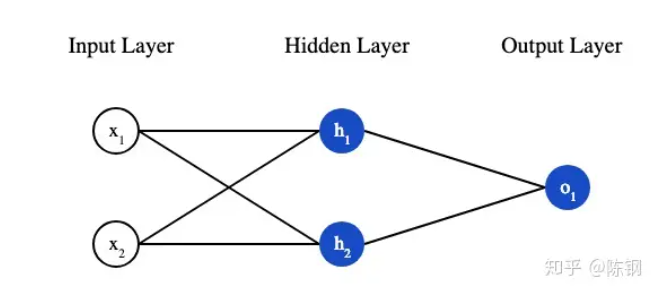

下面给他加一下隐藏层

In [6]:
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)#输入来自前面的输出
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


损失
在训练网络之前，我们需要量化当前的网络是『好』还是『坏』，从而可以寻找更好的网络。这就是定义损失的目的。

我们在这里用平均方差（MSE）损失： 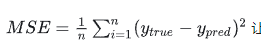
尝试定义一个损失函数

In [7]:
def mse_loss(y_true, y_pred):
      return ((y_true - y_pred) ** 2).mean()#.mean()：这是一个 NumPy 函数，用于计算误差平方数组的平均值，即所有样本误差平方的均值。
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


#### 然后就是训练使得损失函数变小
涉及数学推导比较麻烦这个有详细过程https://zhuanlan.zhihu.com/p/58964140
训练神经网络，第2部分
现在我们有了一个明确的目标：最小化神经网络的损失。通过调整网络的权重和截距项，我们可以改变其预测结果，但如何才能逐步地减少损失？

这一段内容涉及到多元微积分，如果不熟悉微积分的话，可以跳过这些数学内容。

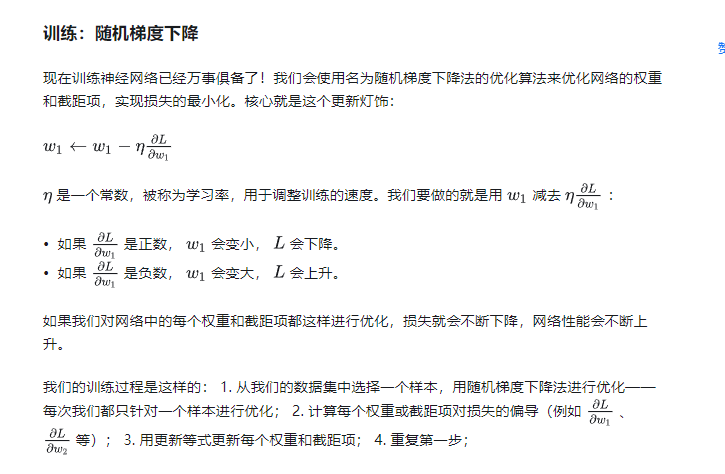
随机梯度就是训练的一个方法

完整过程
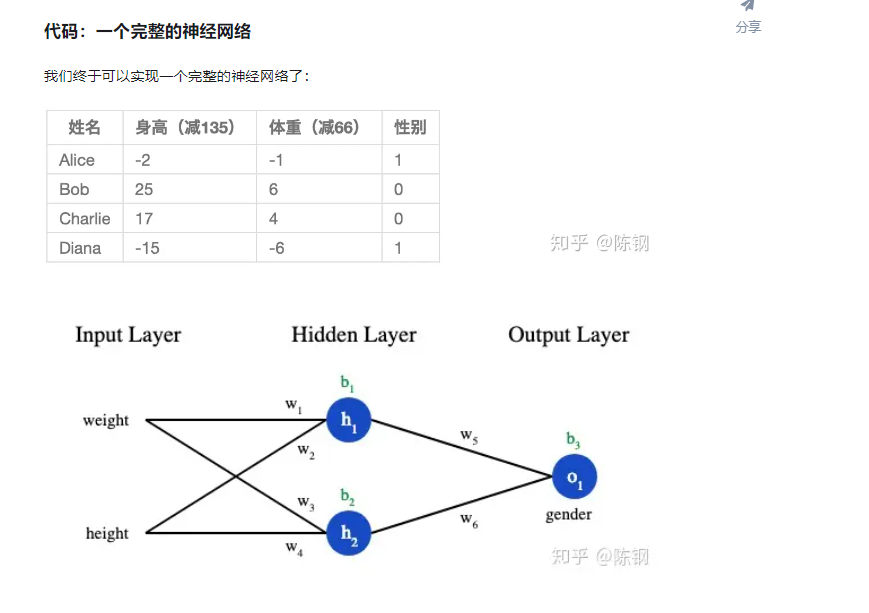

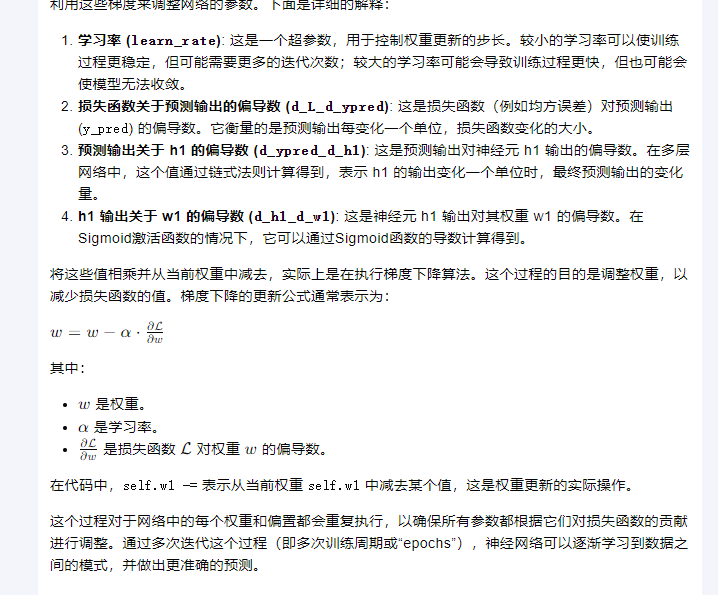

In [8]:
import numpy as np

def sigmoid(x):
    # Sigmoid 激活函数：f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    # Sigmoid 的导数：f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    # y_true 和 y_pred 是相同长度的 numpy 数组。
    return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
    '''
    一个具有以下结构的神经网络：
      - 2个输入
      - 一个有2个神经元（h1, h2）的隐藏层
      - 一个有1个神经元（o1）的输出层

    *** 免责声明 ***：
    下面的代码旨在简单易懂，而非最优。
    真实的神经网络代码看起来与此完全不同。不要使用此代码。
    相反，阅读/运行它以了解这个特定网络的工作原理。
    '''
    def __init__(self):
        # 权重
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # 截距项
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # x 是一个有2个元素的 numpy 数组。
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        '''
        - data 是一个 (n x 2) 的 numpy 数组，n = 数据集中的样本数量。
        - all_y_trues 是一个有 n 个元素的 numpy 数组。
          all_y_trues 中的元素与 data 中的元素相对应。
        '''
        learn_rate = 0.1
        epochs = 1000 # 整个数据集循环的次数

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- 执行前向传播（我们稍后将需要这些值）
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- 计算偏导数。
                # --- 命名：d_L_d_w1 表示 "L 对 w1 的偏导数"
                d_L_d_ypred = -2 * (y_true - y_pred)#损失函数 L 对预测值y——pre的偏导数

                # 神经元 o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # 神经元 h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # 神经元 h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- 更新权重和截距项
                # 神经元 h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # 神经元 h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # 神经元 o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            # --- 在每个 epoch 结束时计算总损失
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))


#np.apply_along_axis：这是NumPy的一个函数，它接受三个主要参数：这行代码的执行流程是：

#apply_along_axis函数遍历data数组的每一行。
#对于每一行，它将该行的数据作为参数传递给self.feedforward方法。
#self.feedforward方法计算输入数据的加权和，加上偏置，然后应用sigmoid函数，返回一个预测值。
#所有行的预测值被收集到y_preds数组中。

#第一个参数是函数，即self.feedforward，这是要应用的函数。
#第二个参数是轴号，这里是1，表示函数将沿着数组的第二维（即行）应用。
#第三个参数是数据数组，这里是data，它是一个二维数组。

# 定义数据集
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# 训练我们的神经网络！
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.259
Epoch 10 loss: 0.212
Epoch 20 loss: 0.179
Epoch 30 loss: 0.150
Epoch 40 loss: 0.125
Epoch 50 loss: 0.104
Epoch 60 loss: 0.086
Epoch 70 loss: 0.073
Epoch 80 loss: 0.061
Epoch 90 loss: 0.053
Epoch 100 loss: 0.046
Epoch 110 loss: 0.040
Epoch 120 loss: 0.035
Epoch 130 loss: 0.032
Epoch 140 loss: 0.028
Epoch 150 loss: 0.026
Epoch 160 loss: 0.024
Epoch 170 loss: 0.022
Epoch 180 loss: 0.020
Epoch 190 loss: 0.019
Epoch 200 loss: 0.017
Epoch 210 loss: 0.016
Epoch 220 loss: 0.015
Epoch 230 loss: 0.014
Epoch 240 loss: 0.014
Epoch 250 loss: 0.013
Epoch 260 loss: 0.012
Epoch 270 loss: 0.012
Epoch 280 loss: 0.011
Epoch 290 loss: 0.011
Epoch 300 loss: 0.010
Epoch 310 loss: 0.010
Epoch 320 loss: 0.009
Epoch 330 loss: 0.009
Epoch 340 loss: 0.009
Epoch 350 loss: 0.008
Epoch 360 loss: 0.008
Epoch 370 loss: 0.008
Epoch 380 loss: 0.007
Epoch 390 loss: 0.007
Epoch 400 loss: 0.007
Epoch 410 loss: 0.007
Epoch 420 loss: 0.007
Epoch 430 loss: 0.006
Epoch 440 loss: 0.006
Epoch 450 loss: 0.006

#### 然后可以使用训练好的模型进行预测


In [9]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.949
Frank: 0.040
